In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data_loader import CIFAR_10_DataLoader
import torch
import losses
%matplotlib inline

In [2]:
file_directory = '/Users/subhojit/Downloads/cifar-10-batches-py'
cdl = CIFAR_10_DataLoader()
xtrain_data, ytrain_data, Xtest, ytest = cdl.load_cifar_10_dataset(file_directory)

xtrain_data = xtrain_data.astype('float32') / 255.0
Xtest = Xtest.astype('float32') / 255.0

# np.random.shuffle(Xtrain)
n1 = int(0.8 * len(xtrain_data))
Xtrain = xtrain_data[:n1]
ytrain = ytrain_data[:n1]
Xdev = xtrain_data[n1:]
ydev = ytrain_data[n1:]

num_classes = len(set(ytrain))

In [8]:
# data preparation
np.random.seed(231)
std_dev = 1
n_hidden = 200
# W1 = np.random.randn(3072, n_hidden) * std_dev
W1 = np.zeros((3072, n_hidden)) * std_dev
b1 = np.zeros(n_hidden)
# W2 = np.random.randn(n_hidden, num_classes) * std_dev
W2 = np.zeros((n_hidden, num_classes)) * std_dev
b2 = np.zeros(10)

parameters = [W1, b1, W2, b2]

print(sum(par.size for par in parameters))

616610


In [4]:
def softmax_loss(scores, y):
    epsilon = 1e-12
    num_examples = scores.shape[0]
    shifted_scores = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(shifted_scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_log_probs = -np.log(probs[np.arange(num_examples), y] + epsilon)
    loss = np.mean(correct_log_probs)
    return loss

def softmax_numpy(x, axis=1):
    x_shifted = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

In [9]:
max_iterations = 10000
batch_size = 128
lossi = []
Hs = []

for i in range(max_iterations):

    #mini batch
    ix = np.random.randint(0, Xtrain.shape[0], (batch_size,))
    Xb, Yb = Xtrain[ix], ytrain[ix]

    #farward pass
    hpreact = np.dot(Xb, W1) + b1
    h1 = np.maximum(hpreact, 0)
    Hs.append(h1)

    scores = np.dot(h1, W2) + b2

    # backward pass
    loss = softmax_loss(scores, Yb)
    lossi.append(loss)
    dscores = softmax_numpy(scores)
    dscores[np.arange(Xb.shape[0]), Yb] -= 1
    dscores /= Xb.shape[0]

    dW2 = np.dot(h1.T, dscores)
    db2 = np.sum(dscores, axis=0)
    dh1 = np.dot(dscores, W2.T)
    dhpreact = dh1 * (hpreact > 0)
    dW1 = np.dot(Xb.T, dhpreact)
    db1 = np.sum(dhpreact, axis=0)

    grads = [dW1, db1, dW2, db2]
    # print(grads)
    lr = 0.01
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")

loss: 2.3026
loss: 2.3025
loss: 2.3019
loss: 2.3022
loss: 2.3030
loss: 2.3030
loss: 2.3027
loss: 2.3024
loss: 2.3026
loss: 2.3021
loss: 2.3026
loss: 2.3025
loss: 2.3027
loss: 2.3024
loss: 2.3019
loss: 2.3028
loss: 2.3020
loss: 2.3022
loss: 2.3023
loss: 2.3017
loss: 2.3031
loss: 2.3025
loss: 2.3018
loss: 2.3016
loss: 2.3018
loss: 2.3024
loss: 2.3018
loss: 2.3035
loss: 2.3038
loss: 2.3027
loss: 2.3013
loss: 2.3035
loss: 2.3027
loss: 2.3017
loss: 2.3040
loss: 2.3029
loss: 2.3029
loss: 2.3020
loss: 2.3017
loss: 2.3031
loss: 2.3019
loss: 2.3019
loss: 2.3027
loss: 2.3032
loss: 2.3025
loss: 2.3018
loss: 2.3031
loss: 2.3032
loss: 2.3032
loss: 2.3017
loss: 2.3017
loss: 2.3029
loss: 2.3028
loss: 2.3021
loss: 2.3029
loss: 2.3027
loss: 2.3039
loss: 2.3032
loss: 2.3023
loss: 2.3037
loss: 2.3034
loss: 2.3028
loss: 2.3032
loss: 2.3012
loss: 2.3040
loss: 2.3037
loss: 2.3014
loss: 2.3013
loss: 2.3030
loss: 2.3035
loss: 2.3031
loss: 2.3034
loss: 2.3019
loss: 2.3028
loss: 2.3023
loss: 2.3039
loss: 2.3034

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2000.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

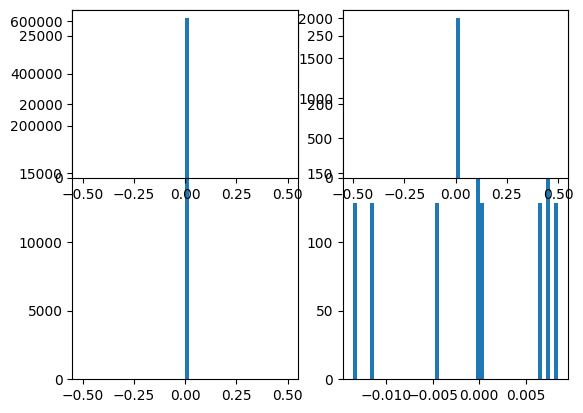

In [10]:
plt.figure()
plt.subplot(121)
plt.hist(h1.reshape(-1).tolist(), 50)
plt.subplot(122)
plt.hist(scores.reshape(-1).tolist(), 50)
plt.subplot(221)
plt.hist(W1.reshape(-1).tolist(), 50)
plt.subplot(222)
plt.hist(W2.reshape(-1).tolist(), 50)

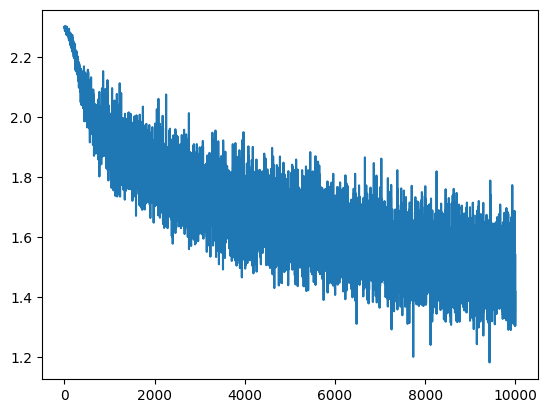

In [7]:
plt.plot(lossi)

In [11]:
def split_loss(split):
    x, y = {
        'train': (Xtrain, ytrain),
        'dev': (Xdev, ydev),
        'test': (Xtest, ytest),
    }[split]
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    loss = softmax_loss(scores, y)
    print(f"{split} => loss: {loss:.4f}")

split_loss('train')
split_loss('dev')


train => loss: 2.3026
dev => loss: 2.3027


In [12]:
split_loss('test')

test => loss: 2.3026


In [14]:
def accuracy(x, labels):
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    probs = softmax_numpy(scores)

    preds = np.argmax(probs, axis=1)
    return np.mean(preds == labels)

accuracy(Xtest, ytest)


np.float64(0.1)

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate([scores]):
    t = layer[0]
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (np.abs(t) > 0.97).astype(np.float32).mean()*100))
    hy, hx = plt.hist(t.tolist(), 50)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')

plt.legend(legends);
plt.title('activation distribution')

In [15]:
for h in Hs:
    print(h[0].mean(), h[0].std())

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
